# Time Series Fundamentals

In [114]:
#Import dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Get bitcoin historical data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-10 11:27:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2024-01-10 11:27:12 (19.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [116]:
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])

In [117]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [119]:
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

<Axes: xlabel='Date'>

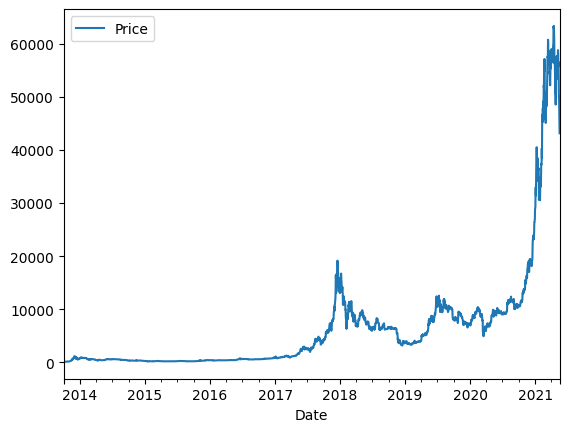

In [120]:
bitcoin_prices.plot(kind="line")

##Importing time sries data with python csv module

In [121]:
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader=csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

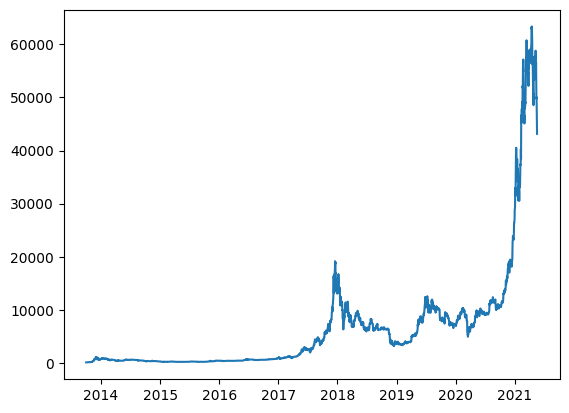

In [122]:
plt.plot(timesteps, btc_price)

## Create train and test data

In [123]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [125]:
split_size=int(0.8*len(prices))

X_train, y_train=timesteps[:split_size], prices[:split_size]

X_test, y_test=timesteps[split_size:], prices[split_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

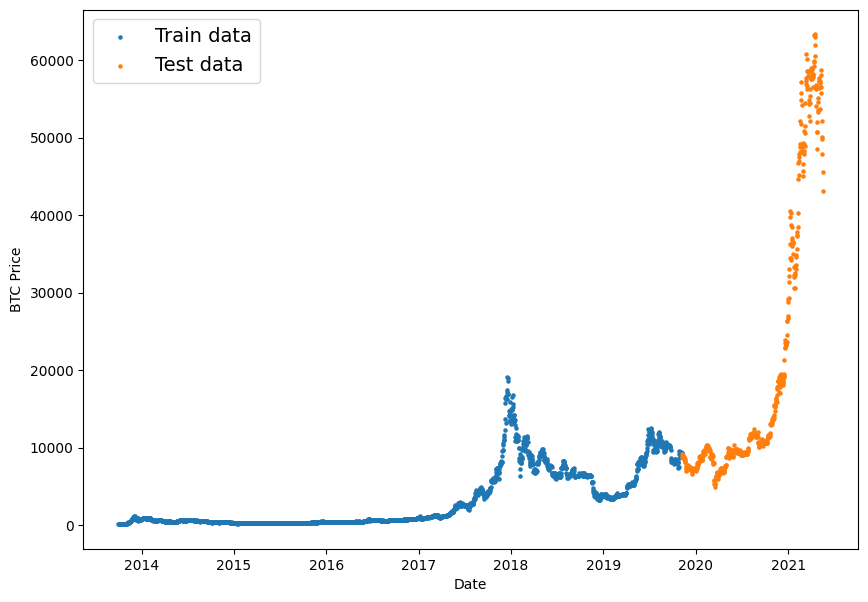

In [126]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [127]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


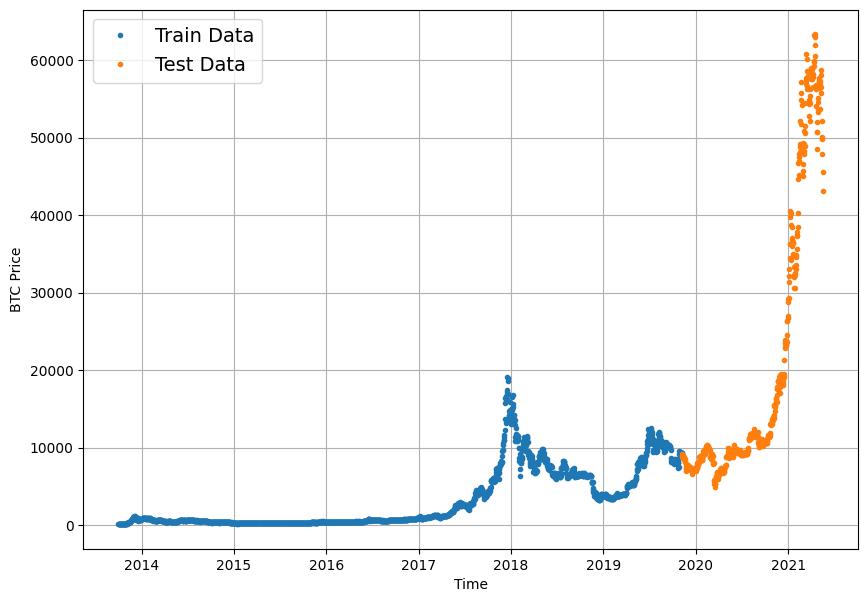

In [128]:
  plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

## Modeling Experiments

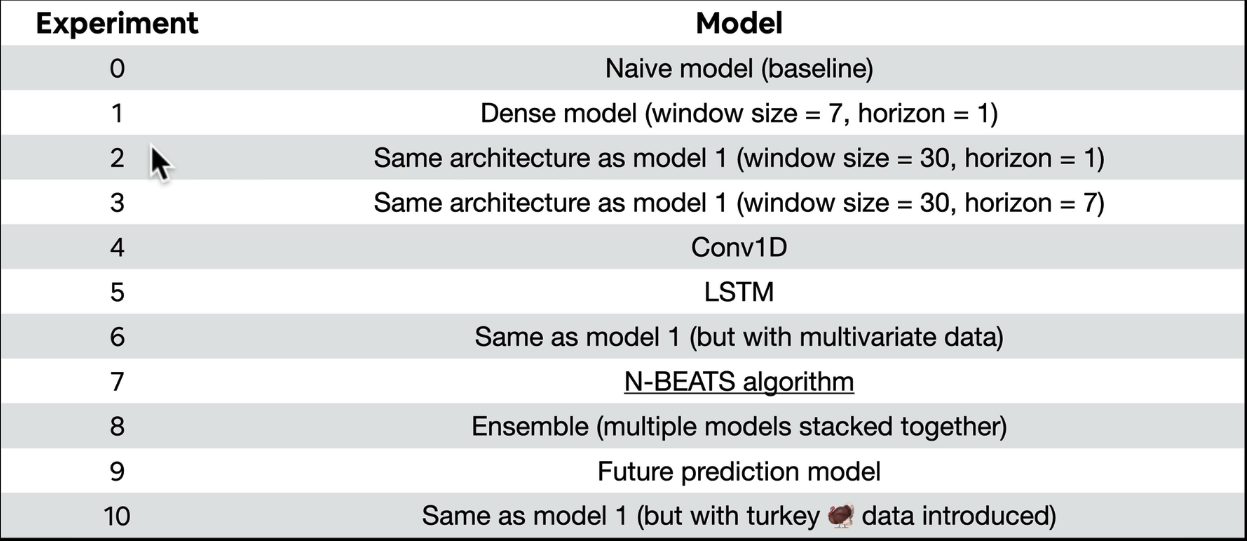



## Model 0: Naive Forecast Baseline

In [129]:
naive_forecast=y_test[:-1]

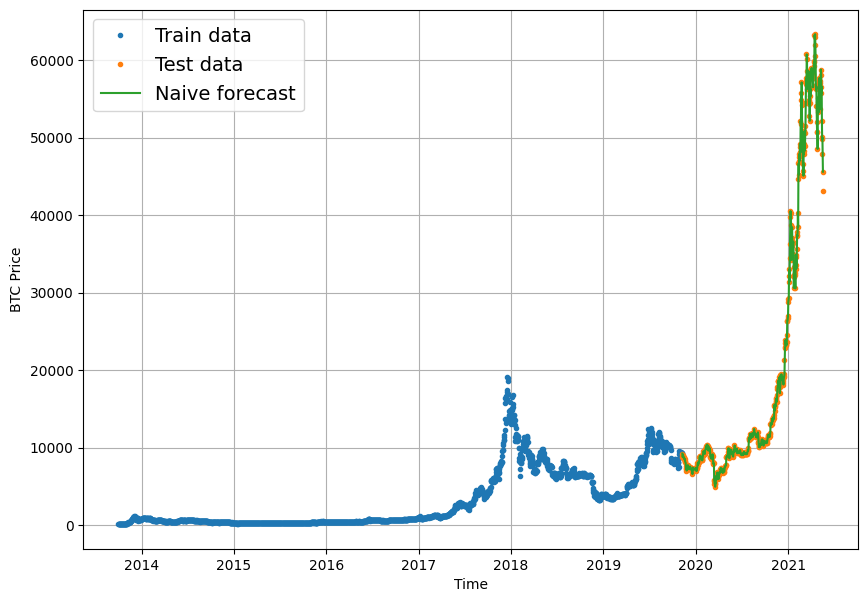

In [130]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [131]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season



In [132]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [133]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [134]:
naive_results=evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Formatting data for deep learning models

In [135]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [136]:
HORIZON= 1
WINDOW_SIZE= 7


In [137]:
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [138]:
test_window, test_label=get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

## Sliding window approach

In [139]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step=np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array=x[window_indexes]

  windows, labels=get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [140]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [141]:
for i in range(3):
  print(f"window: {full_windows[i-3]} -> {full_labels[i-3]}")

window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> [47885.62525472]
window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> [45604.61575361]
window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> [43144.47129086]


In [142]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size=int(len(windows)*(1-test_split))
  train_windows= windows[:split_size]
  train_labels=labels[:split_size]

  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [143]:
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(full_windows, full_labels)

len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [144]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model

In [145]:
tf.random.set_seed(42)

model_1=tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(128, activation="relu"))
model_1.add(tf.keras.layers.Dense(1, activation="linear"))

model_1.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])


In [146]:
model_1.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels), callbacks=create_model_checkpoint("Model_1"))

Epoch 1/100
18/18 [==============================] - 1s 42ms/step - loss: 1812.1816 - mae: 1812.1816 - mse: 9979107.0000 - val_loss: 984.8105 - val_mae: 984.8105 - val_mse: 3163979.5000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 346.8984 - mae: 346.8984 - mse: 462695.0000 - val_loss: 1759.2261 - val_mae: 1759.2261 - val_mse: 7358374.0000
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 227.5613 - mae: 227.5613 - mse: 239855.1875 - val_loss: 980.9980 - val_mae: 980.9980 - val_mse: 3074040.7500
Epoch 4/100
18/18 [==============================] - 1s 33ms/step - loss: 179.0712 - mae: 179.0712 - mse: 162095.3125 - val_loss: 925.1852 - val_mae: 925.1852 - val_mse: 2911224.7500
Epoch 5/100
18/18 [==============================] - 1s 43ms/step - loss: 168.1228 - mae: 168.1228 - mse: 150983.4844 - val_loss: 923.7818 - val_mae: 923.7818 - val_mse: 2790639.5000
Epoch 6/100
18/18 [==============================] - 1s 44ms/step - loss: 161.244

In [147]:
model_1=tf.keras.models.load_model("/content/model_experiments/Model_1")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.3983 - mae: 567.3983 - mse: 1162030.0000


[567.3982543945312, 567.3982543945312, 1162030.0]

In [148]:
def make_preds(model, input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [149]:
model_1_preds=make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8843.032, 8763.22 , 9051.502, 8780.396, 8714.937, 8758.493,
        8675.081, 8513.132, 8458.766, 8531.603], dtype=float32)>)

In [150]:
model_1_results=evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 567.3983,
 'mse': 1162030.5,
 'rmse': 1077.9752,
 'mape': 2.531573,
 'mase': 0.9967617}

In [151]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

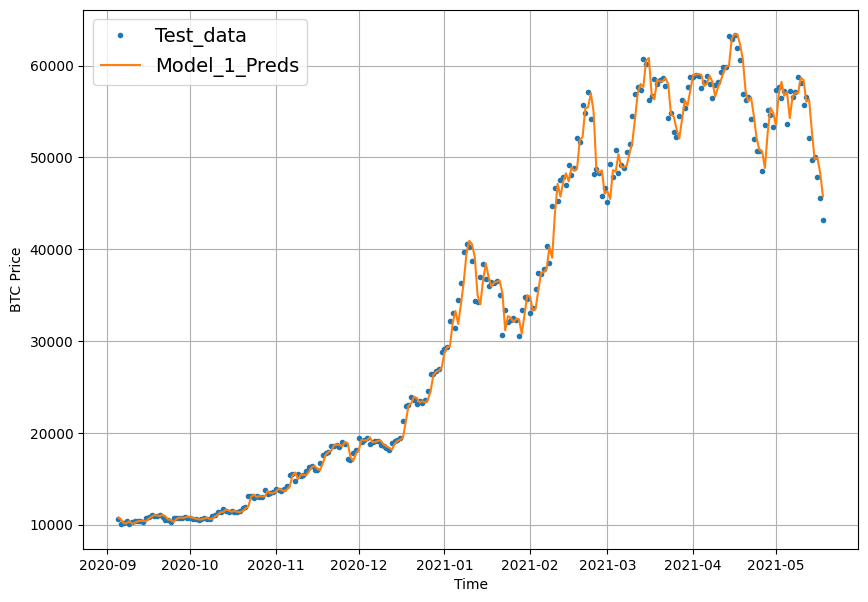

In [152]:
offset=300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="Model_1_Preds")

## Model 2: Dense with window=30, horizon=1

In [153]:
full_windows_30, full_labels_30 = make_windows(prices, window_size=30, horizon=1)
len(full_windows_30), len(full_labels_30)

(2757, 2757)

In [154]:
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(full_windows_30, full_labels_30)

len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [155]:
tf.random.set_seed(42)

model_2=tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(128, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="linear"))

model_2.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

model_2.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels), callbacks=create_model_checkpoint("Model_2"))

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1613.2109 - mae: 1613.2109 - mse: 9695412.0000 - val_loss: 2952.7168 - val_mae: 2952.7168 - val_mse: 22009518.0000
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 597.5874 - mae: 597.5874 - mse: 1544579.3750 - val_loss: 2475.6455 - val_mae: 2475.6455 - val_mse: 15798383.0000
Epoch 3/100
18/18 [==============================] - 0s 29ms/step - loss: 430.4742 - mae: 430.4742 - mse: 823183.0000 - val_loss: 1959.3347 - val_mae: 1959.3347 - val_mse: 11321519.0000
Epoch 4/100
18/18 [==============================] - 1s 63ms/step - loss: 356.2874 - mae: 356.2874 - mse: 576665.6875 - val_loss: 1771.4989 - val_mae: 1771.4989 - val_mse: 9135537.0000
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 319.8447 - mae: 319.8447 - mse: 461162.8750 - val_loss: 1590.3407 - val_mae: 1590.3407 - val_mse: 7672642.5000
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - 

In [156]:
model_2=tf.keras.models.load_model("/content/model_experiments/Model_2")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 649.9069 - mae: 649.9069 - mse: 1475506.7500


[649.9069213867188, 649.9069213867188, 1475506.75]

In [157]:
model_2_preds=make_preds(model_2, test_windows)
len(model_2_preds), model_2_preds[:10]

18/18 [==============================] - 0s 2ms/step


(552,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8870.36  , 8816.678 , 8792.586 , 8676.003 , 8496.281 , 8423.957 ,
        8160.0327, 8084.151 , 8118.155 , 7930.508 ], dtype=float32)>)

In [158]:
model_2_results=evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 649.9068,
 'mse': 1475506.1,
 'rmse': 1214.7041,
 'mape': 2.9696665,
 'mase': 1.1360433}

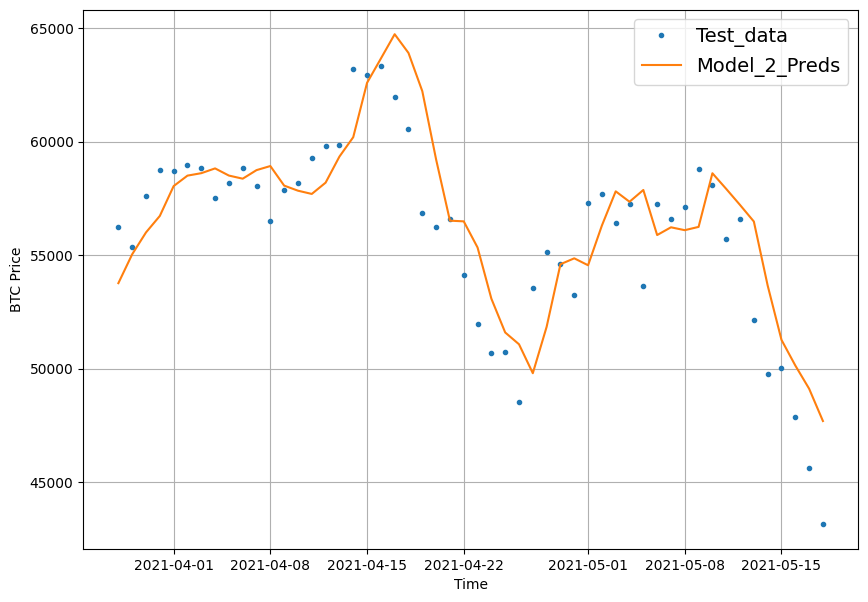

In [159]:
offset=500
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="Model_2_Preds")

In [160]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [161]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

## Model 3: Horizon=7, window=30

In [162]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [163]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1468.4385


1468.4384765625

In [164]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1239.5765


1239.5765380859375

In [165]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9214.137 , 9327.297 , 9405.6875, 9479.338 , 9829.675 , 9849.988 ,
        9703.859 ],
       [9102.473 , 8925.354 , 8939.016 , 9083.053 , 9539.872 , 9487.412 ,
        9337.012 ],
       [8941.6875, 8954.117 , 8795.474 , 9142.966 , 9388.189 , 9160.537 ,
        9233.125 ],
       [8924.483 , 9191.422 , 9051.612 , 9126.746 , 9366.828 , 9253.963 ,
        9254.664 ],
       [8639.045 , 8940.914 , 8836.5   , 8978.771 , 9142.938 , 9125.561 ,
        9076.297 ]], dtype=float32)>

In [166]:
model_3_results=evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1239.5765,
 'mse': 5493698.5,
 'rmse': 1429.9913,
 'mape': 5.6038957,
 'mase': 2.2057571}

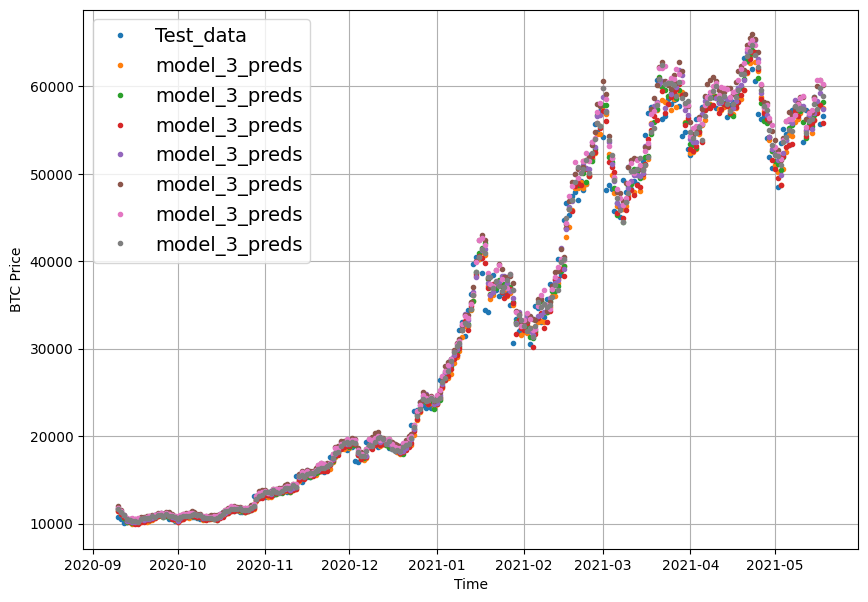

In [167]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

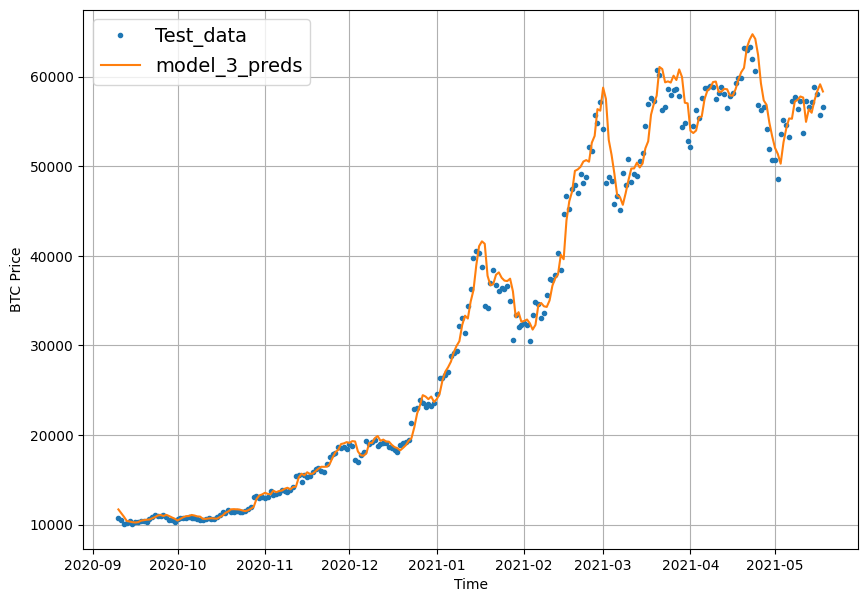

In [168]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

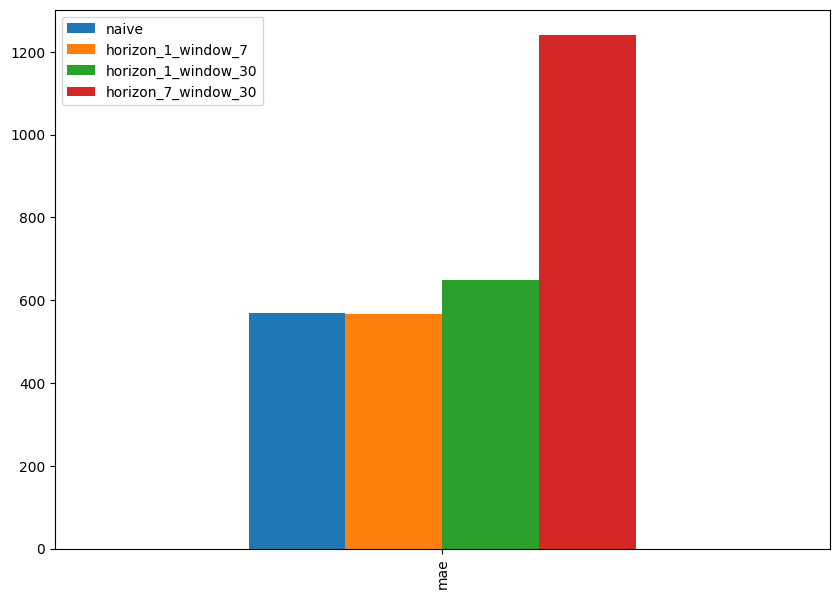

In [169]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [170]:
HORIZON=1
WINDOW_SIZE=7

full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [171]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [172]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [173]:
expand_dims_layer=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [174]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

## Model 4: Conv1D

In [175]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)))
model_4.add(tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"))
model_4.add(tf.keras.layers.Dense(HORIZON, activation="linear"))

model_4.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

In [176]:
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name="Model_4")])

In [177]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 574.9058 - mae: 574.9058 - mse: 1194651.6250


[574.9058227539062, 574.9058227539062, 1194651.625]

In [178]:
model_4=tf.keras.models.load_model("/content/model_experiments/Model_4")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 572.4036 - mae: 572.4036 - mse: 1195857.2500


[572.403564453125, 572.403564453125, 1195857.25]

In [179]:
model_4_preds = make_preds(model_4,
                           input_data=test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8902.769, 8804.417, 8996.485, 8809.042, 8742.177], dtype=float32)>

In [180]:
model_4_results=evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 572.40356,
 'mse': 1195857.1,
 'rmse': 1093.5525,
 'mape': 2.5710979,
 'mase': 1.0055546}

## Model 5: LSTM

In [181]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)))
#model_5.add(tf.keras.layers.LSTM(128, return_sequences=True))
model_5.add(tf.keras.layers.LSTM(128, activation="relu"))
#model_5.add(tf.keras.layers.Dense(32, activation="relu"))
model_5.add(tf.keras.layers.Dense(HORIZON, activation="linear"))

model_5.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

In [182]:
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name="Model_5")])

Epoch 1/100
18/18 [==============================] - 4s 127ms/step - loss: 2593.6584 - mae: 2593.6584 - mse: 16604740.0000 - val_loss: 10727.2158 - val_mae: 10727.2158 - val_mse: 203736064.0000
Epoch 2/100
18/18 [==============================] - 2s 109ms/step - loss: 879.9238 - mae: 879.9238 - mse: 2549058.7500 - val_loss: 1258.0702 - val_mae: 1258.0702 - val_mse: 5074048.0000
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 256.7760 - mae: 256.7760 - mse: 287168.4062 - val_loss: 1387.9312 - val_mae: 1387.9312 - val_mse: 5152953.0000
Epoch 4/100
18/18 [==============================] - 2s 109ms/step - loss: 204.6000 - mae: 204.6000 - mse: 210554.2969 - val_loss: 1098.4348 - val_mae: 1098.4348 - val_mse: 4039235.7500
Epoch 5/100
18/18 [==============================] - 2s 127ms/step - loss: 196.3174 - mae: 196.3174 - mse: 199005.8906 - val_loss: 1096.8531 - val_mae: 1096.8531 - val_mse: 3915382.7500
Epoch 6/100
18/18 [==============================] - 3s 190ms/s

In [183]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 591.8362 - mae: 591.8362 - mse: 1257009.3750


[591.8362426757812, 591.8362426757812, 1257009.375]

In [184]:
model_5=tf.keras.models.load_model("/content/model_experiments/Model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 591.8362 - mae: 591.8362 - mse: 1257009.3750


[591.8362426757812, 591.8362426757812, 1257009.375]

In [185]:
model_5_preds = make_preds(model_5,
                           input_data=test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8973.687, 8834.511, 8982.874, 8810.483, 8762.352], dtype=float32)>

In [186]:
model_5_results=evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 591.83624,
 'mse': 1257009.8,
 'rmse': 1121.1644,
 'mape': 2.6678624,
 'mase': 1.0396924}

## Make a multivariate Dataset

In [187]:
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")


In [188]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [189]:
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

bitcoin_prices_block.iloc[:block_reward_2_days, -1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1]=block_reward_4


In [190]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

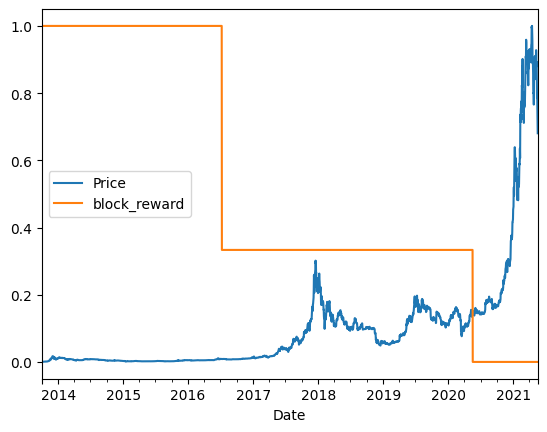

In [191]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), columns=bitcoin_prices_block.columns, index=bitcoin_prices_block.index)
scaled_price_block_df.plot()

In [192]:
HORIZON=1
WINDOW_SIZE=7

bitcoin_prices_windowed=bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"]= bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [193]:
X=bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5), y.head(5)

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [194]:
split_size= int(len(X)*0.8)
X_train, y_train=X[:split_size], y[:split_size]
X_test, y_test=X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

##Model 6: Multivariate model

In [195]:
tf.random.set_seed(42)

model_6=tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Dense(128, activation="relu"))
model_6.add(tf.keras.layers.Dense(1, activation="linear"))

model_6.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name="Model_6")])

Epoch 1/100
18/18 [==============================] - 1s 43ms/step - loss: 1159.2369 - mae: 1159.2369 - mse: 4967457.5000 - val_loss: 2846.4722 - val_mae: 2846.4722 - val_mse: 18568518.0000
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 304.3026 - mae: 304.3026 - mse: 397843.4375 - val_loss: 1067.1472 - val_mae: 1067.1472 - val_mse: 3621467.2500
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 198.1074 - mae: 198.1074 - mse: 185419.1250 - val_loss: 1018.9689 - val_mae: 1018.9689 - val_mse: 3319496.0000
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 180.2721 - mae: 180.2721 - mse: 169221.7344 - val_loss: 918.2276 - val_mae: 918.2276 - val_mse: 2845912.5000
Epoch 5/100
18/18 [==============================] - 0s 28ms/step - loss: 165.8294 - mae: 165.8294 - mse: 146730.0938 - val_loss: 873.2727 - val_mae: 873.2727 - val_mse: 2594021.2500
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 1

In [196]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 620.4429 - mae: 620.4429 - mse: 1259989.1250


[620.44287109375, 620.44287109375, 1259989.125]

In [197]:
model_6=tf.keras.models.load_model("/content/model_experiments/Model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.1742 - mae: 568.1742 - mse: 1161464.7500


[568.1741943359375, 568.1741943359375, 1161464.75]

In [198]:
model_6_preds=make_preds(model_6, X_test)
model_6_results=evaluate_preds(tf.squeeze(y_test), model_6_preds)
model_6_results

18/18 [==============================] - 0s 1ms/step


{'mae': 568.17426,
 'mse': 1161464.8,
 'rmse': 1077.7128,
 'mape': 2.5486307,
 'mase': 0.9981248}

## Model 7: N-Beats Model

In [199]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [200]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [201]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [202]:

backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.88519096 -0.3396409   1.1167848   1.3578378   0.77536446 -0.6356857
 -0.55384624]
Forecast: -0.5126962661743164


In [203]:
HORIZON = 1
WINDOW_SIZE = 7

In [204]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [205]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [206]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [207]:
N_EPOCHS=5000
N_NEURONS= 512
N_LAYERS= 4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE= INPUT_SIZE+HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [208]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [211]:
%%time

tf.random.set_seed(42)

#setup an instance of NBeats Block layer
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="NBEATS_block")


# Create an input layer for NBeat stack

stack_input=tf.keras.layers.Input(shape=INPUT_SIZE, name="stack_input")

#create initial backcast and forecast input

residuals, forecast=nbeats_block_layer(stack_input)

#create stacks of block layers

for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created

  #Use Nbeats block to calculate backcast and forecast

  backcast, block_forecast= NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name=f"NBEATS_block_{i}") (residuals)

  # create double residual stacking
  residuals=tf.keras.layers.subtract([residuals, backcast])
  forecast=tf.keras.layers.add([forecast, block_forecast])


# Put the stack model together

model_7=tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

#Compile the model

model_7.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

#fit the model
model_7.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset, verbose=0,
            callbacks=([create_model_checkpoint(model_name="Model_7_NBEATS"),
                        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)]))

KeyboardInterrupt: 